In [31]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import kernel
from deflected_subgradient import solveDeflected
from SVR import SVR
import matplotlib.pyplot as plt
import random
from svr_grid_search import Gridsearch
import time

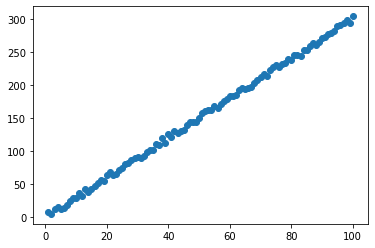

In [18]:
x = np.vstack(np.arange(1,101,1))
y = np.array([3*x[i]+random.uniform(-5,5) for i in range(len(x))])
plt.scatter(x,y)
plt.show()

In [29]:
tr_x, val_x = x[:len(x)-len(x)//5], x[len(x)-len(x)//5:]
tr_y, val_y = y[:len(y)-len(y)//5], y[len(y)-len(y)//5:]
gs = Gridsearch()
gs.set_parameters(
    kernel=["linear"],
        kparam=[{}],
        box=[0.1,1,10],
        eps=[0.1,0.5],
        optiargs=[{'eps':1e-2, 'maxiter':3e3}, {'eps':5e-3, 'maxiter':3e3}, {'eps':5e-4, 'maxiter':3e3}]
)
best_coarse_model = gs.run(
    tr_x, tr_y, val_x, val_y
)

print("BEST COARSE GRID SEARCH MODEL:",best_coarse_model)

svr = best_coarse_model
kernel, kparam, optiargs, eps, box  = gs.get_model_perturbations(best_coarse_model, 10, 6)
print(kernel, kparam, optiargs)
gs.set_parameters(
    eps=eps,
    box=box,
    kernel=kernel,
    kparam=kparam,
    optiargs=optiargs
)
best_fine_model = gs.run(
    x, y, val_x, val_y
)
print("BEST FINE GRID SEARCH MODEL:", best_fine_model)

svr = best_fine_model
pred = [float(svr.predict(x[i])) for i in range(x.shape[0])]
print("T LOSS:", svr.eps_ins_loss(y, pred))

pred = [float(svr.predict(val_x[i])) for i in range(val_x.shape[0])]
print("V LOSS:", svr.eps_ins_loss(val_y, pred))

(GS - SVR) - Creating models
(GS - SVR) - Fitting 18 models
(GS - SVR) - model 1/18
	(GS - SVR) - Time taken: 5.371996879577637 - Remaining: 91.32394695281982
(GS - SVR) - model 2/18
	(GS - SVR) - Time taken: 11.451030492782593 - Remaining: 91.60824394226074
(GS - SVR) - model 3/18
	(GS - SVR) - Time taken: 17.41503357887268 - Remaining: 87.0751678943634
(GS - SVR) - model 4/18
	(GS - SVR) - Time taken: 22.927997827529907 - Remaining: 80.24799239635468
(GS - SVR) - model 5/18
	(GS - SVR) - Time taken: 29.651034355163574 - Remaining: 77.09268932342529
(GS - SVR) - model 6/18
	(GS - SVR) - Time taken: 35.80703282356262 - Remaining: 71.61406564712524
(GS - SVR) - model 7/18
	(GS - SVR) - Time taken: 41.709049463272095 - Remaining: 65.5427920137133
(GS - SVR) - model 8/18
	(GS - SVR) - Time taken: 47.9780375957489 - Remaining: 59.97254699468613
(GS - SVR) - model 9/18
	(GS - SVR) - Time taken: 54.137049436569214 - Remaining: 54.137049436569214
(GS - SVR) - model 10/18
	(GS - SVR) - Time ta

	(GS - SVR) - Time taken: 163.93800950050354 - Remaining: 382.5220221678416
(GS - SVR) - model 19/60
	(GS - SVR) - Time taken: 172.8520486354828 - Remaining: 372.9965260028839
(GS - SVR) - model 20/60
	(GS - SVR) - Time taken: 181.76501393318176 - Remaining: 363.5300278663635
(GS - SVR) - model 21/60
	(GS - SVR) - Time taken: 191.18701338768005 - Remaining: 355.0615962914058
(GS - SVR) - model 22/60
	(GS - SVR) - Time taken: 199.96804857254028 - Remaining: 345.3993566252969
(GS - SVR) - model 23/60
	(GS - SVR) - Time taken: 208.85401058197021 - Remaining: 335.98253876229995
(GS - SVR) - model 24/60
	(GS - SVR) - Time taken: 217.60501146316528 - Remaining: 326.4075171947479
(GS - SVR) - model 25/60
	(GS - SVR) - Time taken: 226.59204649925232 - Remaining: 317.22886509895324
(GS - SVR) - model 26/60
	(GS - SVR) - Time taken: 235.94001007080078 - Remaining: 308.5369362464318
(GS - SVR) - model 27/60
	(GS - SVR) - Time taken: 245.1320140361786 - Remaining: 299.6057949331072
(GS - SVR) - mo

In [32]:
start = time.time()
svr = SVR("linear", box=0.1)
svr.fit(x, y, {'eps': 0.01, 'maxiter': 3000.0, 'vareps': 0.1}, optim_verbose=False)
print(f"elapsed time {time.time() - start}")

elapsed time 9.152998208999634


W : [[3.00825798]] - b: [-0.29195408]
Box: 0.1
PREDICTION (INPUT = 50) [150.12094478]
LOSS: [717.29502948]


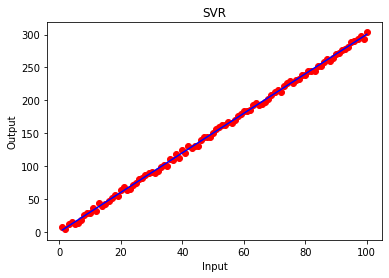

0.998987465632231

In [33]:
to_predict = 50
pred = svr.predict(to_predict)
print(f"W : {svr.W} - b: {svr.intercept}")
print(f"Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(y, pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
r2_score(y, pred)

elapsed time 0.005975961685180664
W : [[3.01045125]] - b: [-0.41619333]
Box: 1.0
PREDICTION (INPUT = 50) [150.10636937]


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


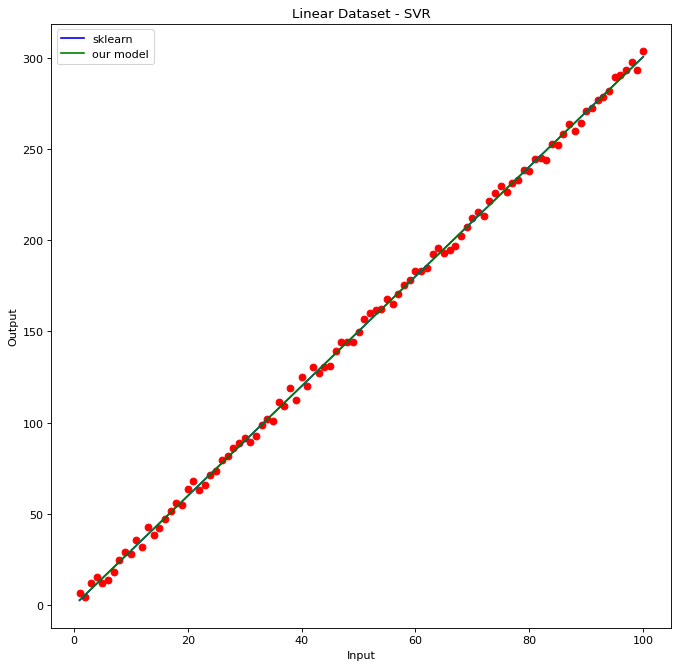

0.9989860747089985

In [71]:
# import sklearn.svm as ss
from matplotlib.pyplot import figure
start = time.time()
regressor = ss.SVR(kernel = 'linear', max_iter=25000)
regressor.fit(x, y.ravel())
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(np.array([[to_predict]]))
print(f"W : {regressor.coef_} - b: {regressor.intercept_}")
print(f"Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})', y_pred)
sklearn_predict = regressor.predict(x)
figure(figsize=(10,10), dpi=80)
plt.scatter(x, y, color = 'red')
plt.plot(x, sklearn_predict, color = 'blue', label='sklearn')
plt.plot(x, pred, color = 'green', label='our model')
plt.title('Linear Dataset - SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

r2_score(y, sklearn_predict)

In [8]:
regressor.support_

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 26, 27, 28])

In [9]:
regressor.epsilon

0.1

In [10]:
regressor.max_iter

-1

In [11]:
regressor.intercept_

array([0.27833306])

In [12]:
params.keys()

NameError: name 'params' is not defined

In [ ]:
params['gamma']

In [ ]:
params['C']

In [ ]:
regressor.coef_

In [ ]:
regressor.dual_coef_